In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving 최민식.png to 최민식 (1).png


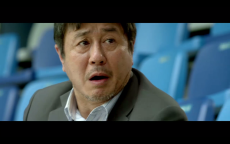

In [36]:
from google.colab import files
myfile = files.upload()

I = cv2.imread('최민식.png', cv2.IMREAD_COLOR)
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

from google.colab.patches import cv2_imshow 
cv2_imshow(cv2.cvtColor(I, cv2.COLOR_RGB2BGR)) #cv2에서는 이미지를 BGR형태로 다룸

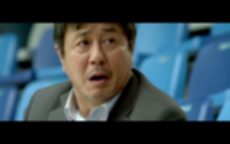

In [152]:
I_blur = cv2.GaussianBlur(I, (3,3), 3)
cv2_imshow(cv2.cvtColor(I_blur, cv2.COLOR_RGB2BGR)) #cv2에서는 이미지를 BGR형태로 다룸

In [153]:
I_sample = I_blur[60:80, 70:90].copy()
cv2_imshow(cv2.cvtColor(I_sample, cv2.COLOR_RGB2BGR)) #cv2에서는 이미지를 BGR형태로 다룸

In [154]:
average = I_sample.mean(axis=0).mean(axis=0)

covarience = np.zeros((3,3))

for i in range(I_sample.shape[0]):
    for j in range(I_sample.shape[1]):
        # x(n)과 mu가 transpose를 안한 형태이므로 앞의 x(k)-mu에 transpose를 해줘야됨.
        covarience += np.dot(np.transpose([(I_sample[i][j] - average)]),(np.array([I_sample[i][j] - average])))
covarience = covarience / (I_sample.shape[0]*I_sample.shape[1])
print(covarience)

[[419.3275     485.533125   455.66625   ]
 [485.533125   600.43349375 563.8773625 ]
 [455.66625    563.8773625  533.622975  ]]


In [155]:
D = np.zeros((I_blur.shape[0],I_blur.shape[1],3))
subs = I_blur - average
for i in range(I_blur.shape[0]):
    for j in range(I_blur.shape[1]):
        # subs[i][j]가 transpose를 안한 형태이므로 뒤의 z-a에 transpose를 해줘야됨
        D[i][j] = (np.dot(np.dot(np.array([subs[i][j]]) , np.linalg.inv(covarience)) , np.transpose([subs[i][j]])))**(1/2)

In [156]:
thres = 7

result = D.copy()
result = cv2.inRange(result, (thres,thres,thres), (255,255,255))

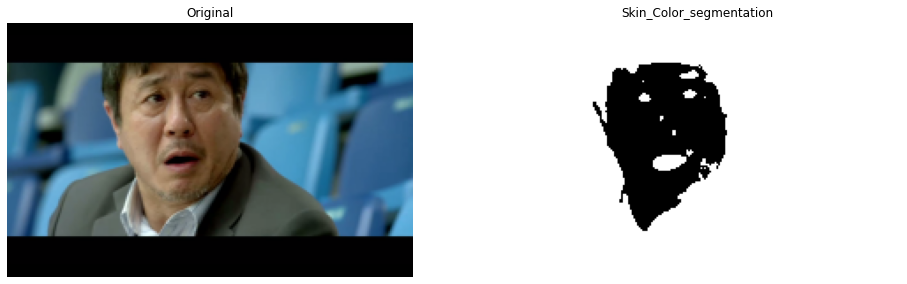

In [157]:
fig = plt.figure(figsize = (16, 8)) 
rows = 1
cols = 2
  
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(I)
ax1.set_title('Original')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(result,cv2.COLOR_GRAY2RGB))
ax2.set_title('Skin_Color_segmentation')
ax2.axis("off")


plt.show()